In [1]:
import numpy as np
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pyarrow.parquet as pq

## Load and filter the data

In [375]:
data2020 = pd.DataFrame()
data2019 = pd.DataFrame()
data2018 = pd.DataFrame()
data2017 = pd.DataFrame()
data2016 = pd.DataFrame()
data2015 = pd.DataFrame()

def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        data = pd.DataFrame()
        
        # Take only the quotes about climate change
        keywords = ["limate change", "lobal warming", "COP", "limate variation", "limate crisis", "CO2 emissions", 
                    "reenhouse effect", "reenhouse gas", "limate emergency", "nvironmental crisis"]
        mask = chunk.quotation.apply(lambda x: any(word in x for word in keywords))
        data = chunk[mask]

        print("Number of filtered quotes {} out of {}".format(len(data), len(chunk)))
        data[['quotation', 'speaker']].head()
        
        # Drop quotes without speaker
        no_speaker = data[data.speaker == "None"].index
        data = data.drop(no_speaker)
        print("{} quotes are removed".format(len(no_speaker)))
        
        # Drop useless informations
        del data["probas"]
        del data["phase"]
        del data["qids"]
        del data["urls"]


        return data
    

with pd.read_json('quotes-2020.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2020 = data2020.append(process_chunk(chunk))
           
data2020.to_pickle("./data2020.pkl")

Processing chunk with 1000000 rows
Number of filtered quotes 2360 out of 1000000
727 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2336 out of 1000000
771 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2289 out of 1000000
686 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2371 out of 1000000
714 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2444 out of 1000000
763 quotes are removed
Processing chunk with 244449 rows
Number of filtered quotes 555 out of 244449
195 quotes are removed


In [376]:
with pd.read_json('quotes-2019.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2019 = data2019.append(process_chunk(chunk))
        
data2019.to_pickle("./data2019.pkl")

Processing chunk with 1000000 rows
Number of filtered quotes 2469 out of 1000000
774 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2546 out of 1000000
811 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2497 out of 1000000
799 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2493 out of 1000000
799 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2444 out of 1000000
762 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2371 out of 1000000
763 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2419 out of 1000000
765 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2373 out of 1000000
754 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2564 out of 1000000
779 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 243

In [378]:
with pd.read_json('quotes-2018.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2018 = data2018.append(process_chunk(chunk))
        
data2018.to_pickle("./data2018.pkl")

Processing chunk with 1000000 rows
Number of filtered quotes 1179 out of 1000000
355 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1206 out of 1000000
353 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1209 out of 1000000
388 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1241 out of 1000000
360 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1176 out of 1000000
354 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1215 out of 1000000
357 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1218 out of 1000000
372 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1240 out of 1000000
375 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1259 out of 1000000
381 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 123

In [379]:
with pd.read_json('quotes-2017.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2017 = data2017.append(process_chunk(chunk))
        
data2017.to_pickle("./data2017.pkl")

Processing chunk with 1000000 rows
Number of filtered quotes 1308 out of 1000000
420 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1236 out of 1000000
411 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1265 out of 1000000
407 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1272 out of 1000000
415 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1279 out of 1000000
411 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1285 out of 1000000
420 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1304 out of 1000000
442 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1221 out of 1000000
422 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1268 out of 1000000
393 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 129

In [380]:
with pd.read_json('quotes-2016.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2016 = data2016.append(process_chunk(chunk))
        
data2016.to_pickle("./data2016.pkl")

Processing chunk with 1000000 rows
Number of filtered quotes 1137 out of 1000000
330 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1235 out of 1000000
363 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1245 out of 1000000
422 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1239 out of 1000000
390 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1267 out of 1000000
389 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1182 out of 1000000
368 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1253 out of 1000000
361 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1243 out of 1000000
390 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1160 out of 1000000
353 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 123

In [381]:
with pd.read_json('quotes-2015.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2015 = data2015.append(process_chunk(chunk))
        
data2015.to_pickle("./data2015.pkl")

Processing chunk with 1000000 rows
Number of filtered quotes 1589 out of 1000000
464 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1571 out of 1000000
475 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1645 out of 1000000
448 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1605 out of 1000000
426 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1540 out of 1000000
434 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1565 out of 1000000
478 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1553 out of 1000000
452 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1617 out of 1000000
477 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1590 out of 1000000
438 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 163

In [3]:
print(len(data2020))
data2020.head()

8499


,quoteID,quotation,speaker,date,numOccurrences
1223,2020-01-29-062975,Many make the link today between their experie...,Peter Maurer,2020-01-29 09:04:36,5
1755,2020-02-10-076321,the National Energy and Climate Plans are how ...,Kadri Simson,2020-02-10 05:51:51,1
1959,2020-01-06-069057,"This budget also allows us to earmark £ 500,00...",John Whitehead,2020-01-06 11:49:00,1
2691,2020-03-10-005294,"As a state, we will pursue every option availa...",Kate Brown,2020-03-10 20:47:28,2
3120,2020-02-11-027545,how will you inspire Americans who have given ...,Amy Klobuchar,2020-02-11 12:29:43,1


In [4]:
print(len(data2019))
data2019.head()

37391


,quoteID,quotation,speaker,date,numOccurrences
470,2019-09-13-002852,acutely aware we are in the midst of a climate...,Michael Thomson,2019-09-13 00:00:00,1
1015,2019-09-26-057277,It's managing those zillions of microbial cell...,Thomas Crowther,2019-09-26 11:00:45,1
2314,2019-03-28-015294,Climate change is the single most important is...,Nicola Sturgeon,2019-03-28 14:55:43,1
2316,2019-06-28-012580,Climate change represents an existential threa...,Kamala Harris,2019-06-28 04:10:00,1
2511,2019-06-19-067938,"Near-zero emission CNG vehicles, paired with r...",Andrew West,2019-06-19 19:33:00,1


In [5]:
print(len(data2018))
data2018.head()

31424


,quoteID,quotation,speaker,date,numOccurrences
839,2018-11-14-010036,At 3AM when I stare at the ceiling and worry a...,PETER THOMSON,2018-11-14 19:28:55,3
1434,2018-11-28-015410,Climate change is directly impacting our healt...,Howard Frumkin,2018-11-28 23:41:00,6
2855,2018-05-01-035048,"His job is to give the 1,000-foot view of clim...",John Byrne,2018-05-01 18:02:18,1
4849,2018-10-25-056957,I'm delighted to see how many more businesses ...,Claire Perry,2018-10-25 09:37:07,1
5489,2018-05-03-069151,It is our response as a company to climate cha...,Sinead Lynch,2018-05-03 05:00:58,1


In [6]:
print(len(data2017))
data2017.head()

22895


,quoteID,quotation,speaker,date,numOccurrences
441,2017-10-10-083023,left the realm of the merely destructive and e...,Tanya Plibersek,2017-10-10 05:07:05,86
572,2017-09-06-003914,advance this climate change agenda.,Rush Limbaugh,2017-09-06 23:12:48,73
805,2017-07-06-075459,may find some allies on climate change,Donald Trump,2017-07-06 09:04:06,1
845,2017-12-20-072848,Mayor Lee's commitment to environmental policy...,Gina McCarthy,2017-12-20 09:00:35,1
1777,2017-06-06-081706,"now under threat as never before: pollution, o...",António Guterres,2017-06-06 11:44:00,1


In [7]:
print(len(data2016))
data2016.head()

11629


,quoteID,quotation,speaker,date,numOccurrences
1205,2016-07-19-025193,HAARP is an advanced model of a super powerful...,Anil Madhav Dave,2016-07-19 10:37:03,1
2250,2016-07-07-042460,I urge this Congress to come up with a biparti...,President Barack Obama,2016-07-07 01:40:20,1
5333,2016-04-27-116144,They tend not to see the importance of the imp...,Ahmed Djoghlaf,2016-04-27 01:53:36,2
5648,2016-05-10-128944,"Together, we've done great work here in Califo...",Kamala Harris,2016-05-10 19:04:29,2
7556,2016-12-08-015155,But we still need a lot of energy to power the...,Urs Hölzle,2016-12-08 15:14:00,1


In [8]:
print(len(data2015))
data2015.head()

23654


,quoteID,quotation,speaker,date,numOccurrences
5265,2015-08-19-056730,It's very important to understand how the ocea...,Helen McGregor,2015-08-19 11:46:00,2
5891,2015-09-28-067347,man-made emissions are an insignificant part o...,John Abraham,2015-09-28 23:16:52,1
7868,2015-09-29-052783,In the final months before crucial climate tal...,Bill de Blasio,2015-09-29 16:10:01,1
9207,2015-10-29-104475,The Baker Polito Administration is fully devot...,Peter Lorenz,2015-10-29 10:49:41,3
9709,2015-05-07-042445,The general narrative is addressing climate ch...,Dallas Burtraw,2015-05-07 17:55:43,2


## Load data from pickle

In [2]:
data2020 = pd.read_pickle('data2020.pkl', compression='infer')
data2019 = pd.read_pickle('data2019.pkl', compression='infer')
data2018 = pd.read_pickle('data2018.pkl', compression='infer')
data2017 = pd.read_pickle('data2017.pkl', compression='infer')
data2016 = pd.read_pickle('data2016.pkl', compression='infer')
data2015 = pd.read_pickle('data2015.pkl', compression='infer')

In [3]:
data = data2020
data = data.append(data2019, ignore_index=True)
data = data.append(data2018, ignore_index=True)
data = data.append(data2017, ignore_index=True)
data =data.append(data2016, ignore_index=True)
data = data.append(data2015, ignore_index=True)
len(data)

135492

## Load speaker data

In [4]:
df_QID= pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')
df_QID.head()

,Label,Description
QID,,
Q31,Belgium,country in western Europe
Q45,Portugal,country in southwestern Europe
Q75,Internet,global system of connected computer networks
Q148,People's Republic of China,sovereign state in East Asia
Q155,Brazil,country in South America


In [216]:
df_speaker = pd.read_parquet("speaker_attributes.parquet", engine='pyarrow')
df_speaker.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [217]:
len(df_QID)

36969

In [218]:
len(df_speaker)

9055981

In [219]:
df_speaker = df_speaker.dropna(subset=['date_of_birth'])

In [220]:
len(df_speaker)

5017333

In [221]:
df_speaker.date_of_birth = [item[0] for item in df_speaker.date_of_birth]

In [224]:
df_speaker['date_of_birth'] = pd.to_datetime(df_speaker.date_of_birth, format='+%Y-%m-%d', exact=False, errors='ignore')

In [225]:
df_speaker = df_speaker.sort_values(by = 'date_of_birth', ascending = False)
df_speaker = df_speaker.drop_duplicates(subset = ['label'], keep = 'first')
df_speaker

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
7193566,None,-8000-00-00T00:00:00Z,None,[Q6581072],1363816969,None,None,None,None,None,Q25583326,Loschbur-Fra,None,item,None
6809976,None,-7999-01-01T00:00:00Z,None,[Q6581097],1254639367,None,None,None,None,None,Q455750,Koelbjerg Woman,None,item,None
365445,None,-7200-00-00T00:00:00Z,None,[Q6581072],1372493488,None,None,None,None,None,Q21044994,Frau von Österöd,None,item,None
3519913,[Gough’s Cave 1 (GC1)],-7150-00-00T00:00:00Z,None,[Q6581097],1325334083,None,None,[Q27443],None,None,Q4508563,Cheddar Man,None,item,None
4716002,None,-7000-00-00T00:00:00Z,None,[Q6581072],1371620926,None,None,None,None,None,Q6981339,Bäckaskogskvinna,None,item,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836325,None,+0001-00-00T00:00:00Z,None,[Q6581097],1135337566,None,None,None,None,None,Q1348937,Garab Dorje,None,item,[Q748]
5726580,None,+0001-00-00T00:00:00Z,None,[Q6581097],1308758061,None,None,[Q133485],None,None,Q2070197,Baba ben Buta,None,item,[Q9268]
3685549,None,+0001-00-00T00:00:00Z,None,[Q6581072],1378588294,None,None,None,None,None,Q15916381,Sophia the Martyr,None,item,None
3647564,"[Servius Sulpicius Icelus Marcianus, Icelus]",+0001-00-00T00:00:00Z,[Q1747689],[Q6581097],1327339563,None,None,[Q82955],None,None,Q11926389,Icelus Marcianus,None,item,None


In [226]:
len(df_speaker)

4226509

In [229]:
df_speaker.loc[df_speaker['label'] == 'Elizabeth Warren']

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
4544778,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",+1949-06-22T00:00:00Z,[Q30],[Q6581072],1394365746,[Q49078],W000817,"[Q185351, Q82955, Q37226, Q1622272, Q40348, Q1...",[Q29552],"[Q163727, Q1540185]",Q434706,Elizabeth Warren,[Q28220813],item,[Q33203]


In [250]:
Bernie_Sanders_occupations = df_speaker[df_speaker.label == 'Bernie Sanders'].occupation.to_numpy()[0]
Bernie_Sanders_party = df_speaker[df_speaker.label == 'Bernie Sanders'].party.to_numpy()[0]

In [251]:
Greta_occupations = df_speaker[df_speaker.label == 'Greta Thunberg'].occupation.to_numpy()[0]
Greta_party = df_speaker[df_speaker.label == 'Greta Thunberg'].party.to_numpy()[0]

In [252]:
print(Greta_party)

None


In [253]:
df_QID.loc[df_QID.index.intersection(Bernie_Sanders_occupations)]


,Label,Description
QID,,
Q154549,carpenter,profession; person who performs carpentry
Q1622272,university teacher,person teaching at a university
Q36180,writer,person who uses written words to communicate i...
Q82955,politician,"person involved in politics, person who holds ..."
Q578109,television producer,occupation within video production for TV
Q1930187,journalist,"person who collects, writes and distributes ne..."


In [254]:
df_QID.loc[df_QID.index.intersection(Bernie_Sanders_party)]

,Label,Description
QID,,
Q327591,independent politician,individual not affiliated to any political party
Q29552,Democratic Party,political party in the United States
Q6542163,Liberty Union Party,political party in Vermont


# First visualization of the data

### Number of words per quote

In [51]:
word_per_quote = data2019["quotation"].apply(lambda x : len(x.split()))

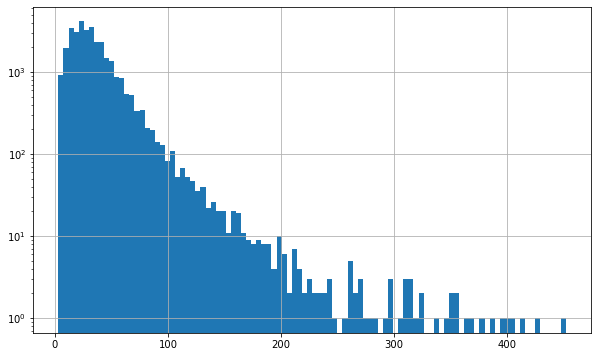

In [59]:
word_per_quote.hist(bins=100,  figsize=(10, 6))
plt.yscale('log')

plt.title('Number of words per quote')
plt.xlabel('Number of words')
plt.ylabel('Number of quotes [log]')

plt.show()

Words embeding models are sensible to the difference in the length of the quotes, thus it can be helpful to be aware that we might have issues because of this inbalance.
Not forget here that dots and commas are also counted as words. 

### Repartition over the year

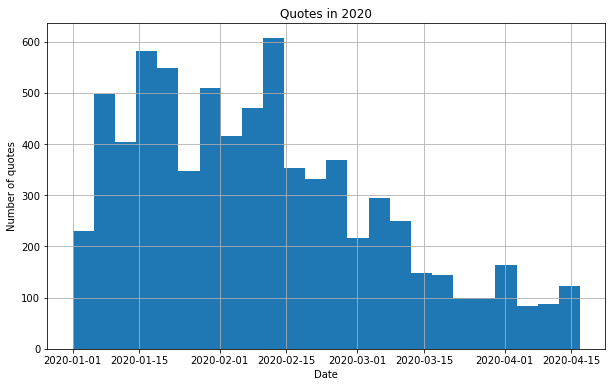

2020-01-01 00:00:00
2020-04-16 20:46:52


In [12]:
data2020['date'].hist(bins=24, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of quotes')
plt.title('Quotes in 2020')
plt.show()

print(min(data2020['date']))
print(max(data2020['date']))

#### Comments
* Much less apparition of the climate change in the newspapper from in March and April 2020. The decrease coincides with the explosion of the pandemic of Covid-19 in the world. 

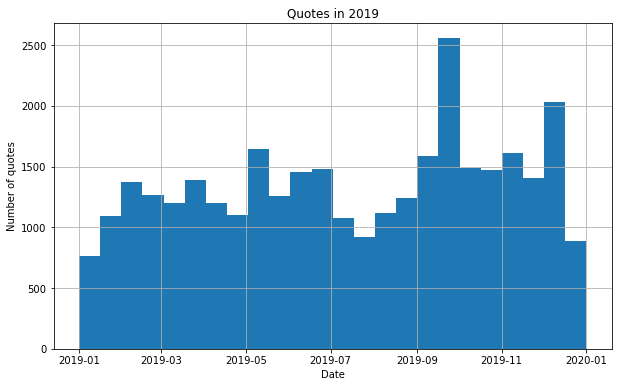

2019-01-01 02:18:32
2019-12-31 23:29:13


In [25]:
data2019['date'].hist(bins=24, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of quotes')
plt.title('Quotes in 2019')
plt.show()

print(min(data2019['date']))
print(max(data2019['date']))

#### Comments
* Peak in end of september. By looking on the internet the first result shows that the month of september 2019 was the hottest ever seen since the beginning of the regostration of the temperature.
* The second peak, beginning of December, coicides with the date of the COP25.

### Speakers that come up the more often

In [234]:
n = 20

In [235]:
most_speaker = data['speaker'].value_counts()[:n].index.tolist()

In [236]:
most_speaker

['Bernie Sanders',
 'President Barack Obama',
 'Narendra Modi',
 'Jay Inslee',
 'Justin Trudeau',
 'Jerry Brown',
 'Michael Mann',
 'President Obama',
 'Catherine McKenna',
 'Al Gore',
 'Donald Trump',
 'Pope Francis',
 'Antonio Guterres',
 'Greta Thunberg',
 'President Donald Trump',
 'Bill McKibben',
 'Alexandria Ocasio-Cortez',
 'Scott Pruitt',
 'John Kerry',
 'James Shaw']

At first sight, we can see that there is mostly politicians.  
If we look at the american politicians, most of them are democrate: Bernie Sanders, Alexandria Ocasio-Cortez, Elizabeth Warren, Michael Bloomberg, Nancy Pelosi.
For further analysis, we will use the speaker data. 

In [237]:
df_most_speaker = pd.DataFrame(columns = ['speaker', 'main_party', 'academic_degree'])

In [238]:
df_most_speaker.speaker = most_speaker

df_most_speaker.party = df_QID.loc[df_QID.index.intersection()]

TypeError: intersection() missing 1 required positional argument: 'other'

In [239]:
most_speaker_party = []
for n,i in enumerate(most_speaker):
    print(i)
    if df_speaker[df_speaker.label == i].party.empty :
        df_most_speaker.party[n] = 'None'
        print('salut')
    if df_speaker[df_speaker.label == i].party.to_numpy() == None:
        df_most_speaker.party[n] = 'None'
        print('hello')
    else:
        print(len(df_speaker[df_speaker.label == i].party.to_numpy()[0]))

Bernie Sanders


<ipython-input-239-7bc7c09c48e8>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if df_speaker[df_speaker.label == i].party.to_numpy() == None:


5
President Barack Obama


AttributeError: 'DataFrame' object has no attribute 'party'

# PROBLEM:
Elizabeth Warren a plusieurs ligne dans le tableau mais que une qui contient des infos faut supprimer


In [241]:
        most_speaker_party.append(df_speaker[df_speaker.label == i].party.to_numpy()[0])
        print('2')
        if df_speaker[df_speaker.label == i].party.all:
            continue
        else:
            print(df_QID.loc[df_QID.index.intersection(most_speaker_party[n])])
        print('3')
        
    if df_speaker[df_speaker.label == i].party == 'None':
        df_most_speaker.party[n] = 'None'
        print('hello')

print(most_speaker_party)

[array(['Q29552'], dtype=object), array(['Q6542163', 'Q29552', 'Q327591', 'Q327591', 'Q29552'], dtype=object), None, array(['Q29552'], dtype=object), None, array(['Q138345'], dtype=object), 'None', None, array(['Q138345'], dtype=object), array(['Q29552'], dtype=object), array(['Q1571660'], dtype=object), array(['Q10230'], dtype=object), None, array(['Q29552'], dtype=object), array(['Q216082'], dtype=object), None, array(['Q29552'], dtype=object), 'None', array(['Q29552'], dtype=object), None]


In [248]:
df_QID.loc[df_QID.index.intersection(most_speaker_party[7])]

TypeError: Input must be Index or array-like

## First attempts of quotations retrieval

We tried to apply an alorithm to pick up all the quotes related to cliamte change but it is not ready now. With the coming lecture we will be able to fix it.  
We focused on the 100 000 first lines of the 2020 dataset.


In [14]:
df = pd.read_json('quotes-2020.json.bz2', compression='bz2', nrows=100000, lines=True)

### 1. Word2Vec

In [15]:
# Preprocessing of the data to remove stop-words and tokenize the quotes
vocab_quotes = df.quotation.apply(gensim.utils.simple_preprocess)

In [16]:
# Define the model and the parameters
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4)

In [17]:
model.build_vocab(vocab_quotes, progress_per=1000)

In [18]:
model.train(vocab_quotes, total_examples=model.corpus_count, epochs=model.epochs)

(8829356, 11833700)

In [21]:
model.wv.most_similar("climate", topn=30)

[('economic', 0.7479218244552612),
 ('global', 0.7118955850601196),
 ('current', 0.701635479927063),
 ('data', 0.701321005821228),
 ('policy', 0.6959260106086731),
 ('environmental', 0.6941445469856262),
 ('science', 0.6937196850776672),
 ('economy', 0.6861879229545593),
 ('structural', 0.6811080574989319),
 ('risks', 0.6744256615638733),
 ('policies', 0.6719207763671875),
 ('carbon', 0.6714789867401123),
 ('financial', 0.670987069606781),
 ('transparency', 0.6707075238227844),
 ('significant', 0.6703941822052002),
 ('awareness', 0.6698325872421265),
 ('accurate', 0.6639865040779114),
 ('scope', 0.6620934009552002),
 ('urgency', 0.6592832207679749),
 ('sustainable', 0.659204363822937),
 ('investors', 0.6591705679893494),
 ('disruption', 0.6580424904823303),
 ('emissions', 0.6571123600006104),
 ('minimizes', 0.6541130542755127),
 ('sustainability', 0.6524901390075684),
 ('economies', 0.6507850885391235),
 ('consumer', 0.6506547331809998),
 ('comprehensive', 0.6459457874298096),
 ('coal'

A lot of words are not directly related to climamate change. We can use maybe this list to imporve ours but we can not use directly.

### 2. Doc2Vec

In [22]:
# We need to convert data into format supported by the Doc2Vec librairy
tagged_data = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(vocab_quotes)]

In [23]:
model = gensim.models.Doc2Vec(vector_size=100, dbow_words= 1, dm=0,  window=5, seed=1337, min_count=5, workers=4,alpha=0.025, min_alpha=0.025)

In [24]:
model.build_vocab(tagged_data)

In [25]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=10)

In [26]:
tokens = "climate warming environment".split()
new_vector = model.infer_vector(tokens)
sims = model.dv.most_similar([new_vector], topn=30)

In [27]:
for elt in sims :
    print(str(df.iloc[[elt[0]]]['quotation']))

6518    Risky Business: Climate and the Macroeconomy,
Name: quotation, dtype: object
23771    in response to the climate changing,
Name: quotation, dtype: object
47475    Responses to Climate Change,
Name: quotation, dtype: object
91030    launches a movement to change the system
Name: quotation, dtype: object
19102    overrun [ ning ] the planet,
Name: quotation, dtype: object
52652    Rise Against Militarism, Racism and the Climat...
Name: quotation, dtype: object
21455    life ‐ sustaining climate system.
Name: quotation, dtype: object
10474    epically outmatched by a global pandemic.
Name: quotation, dtype: object
19419    the global elite's panic room.
Name: quotation, dtype: object
85019    Climate World War III.
Name: quotation, dtype: object
68263    The drivers in the community are for decarboni...
Name: quotation, dtype: object
40763    Adapting to climate change isn't enough.
Name: quotation, dtype: object
95234    clear climate change fuelled the ferocity of t...
Name: quo

#### Conclusion:
We get results that seem more conclusive but we still get some incoherent quotes in the results. Furthermore, we didn't find a way to scale it for our very large data set. When chunking the data, we had to train it for every chunk which takes too long. For now, we chose to stick with the naive retrieval method.